In [1]:
import pretty_midi
import symusic
import mido
import numpy as np
import joblib
import glob
import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# sns.set_style('white')
# sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
import os
from pathlib import Path
# plotting.py contains utility functions for making nice histogram plots
# import util.plotting as plotting
from util.play_midi import play_midi
from statistics import mean, stdev, variance
import random
import miditok
import pandas as pd
from tqdm import tqdm 

from huggingface_hub import notebook_login
import ipywidgets

In [2]:
midi_files = list(Path("data/jazz_midi").glob("*.mid"))

print(len(midi_files))

934


In [5]:
from symusic import Score
s = Score(midi_files[-2])

# You'd better resample the score before converting it to the piano roll to reduce the size of it
# tpq=6 means that the minimum time unit is 1/6 quarter note or 1/24 note
# min_dur=1 means that the duration of a note is at least 1 time unit
s_quantized = s.resample(tpq=6, min_dur=1)

# 4D np array, [modes, tracks, pitch, time]
s_pianoroll = s_quantized.pianoroll(
    # the modes of the piano roll， which determines the "modes dim"
    # only the following modes are supported: "onset", "frame", "offset"
    # you could determine the order by yourself
    modes=["onset", "frame", "offset"], # List[str]
    pitch_range=[0, 128],   # the pitch range (half-open interval) of the piano roll, [0, 128) by default
    encode_velocity=True    # make the pianoroll binary or filled with velocity
)
s_pianoroll[0].shape

(4, 128, 4045)

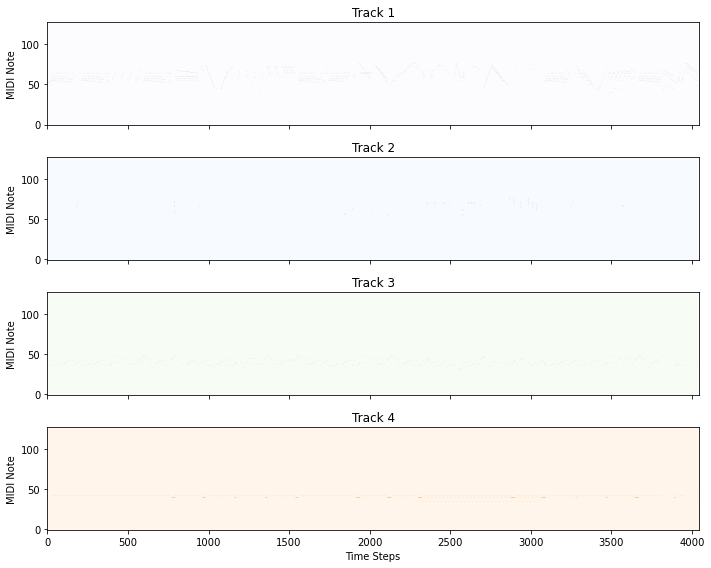

In [7]:
def plot_piano_roll(data, colors):
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    for i in range(len(data)):
        # axs[i].imshow(data[i], aspect='auto', origin='lower', cmap=colors[i])
        axs[i].imshow(data[i], aspect='auto', origin='lower', cmap=colors[i], interpolation='nearest')
        axs[i].set_title(f'Track {i+1}')
        axs[i].set_ylabel('MIDI Note')

    axs[3].set_xlabel('Time Steps')
    plt.tight_layout()
    plt.show()

# Define colors for each track
colors = ['Purples', 'Blues', 'Greens', 'Oranges']

# Plot the piano roll
plot_piano_roll(s_pianoroll[0], colors)